In [1]:
import numpy as np
import matplotlib.pyplot as plt

Octave pseudocode (https://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab):
```octave
th = 1;
mu = 1.2;
sig = 0.3;
dt = 1e-2;
t = 0:dt:2;             % Time vector
x0 = 0;                 % Set initial condition
rng(1);                 % Set random seed
W = zeros(1,length(t)); % Allocate integrated W vector
for i = 1:length(t)-1
    W(i+1) = W(i)+sqrt(exp(2*th*t(i+1))-exp(2*th*t(i)))*randn;
end
ex = exp(-th*t);
x = x0*ex+mu*(1-ex)+sig*ex.*W/sqrt(2*th);
figure;
plot(t,x);
```

$$x_t=x_0e^{−θt}+μ(1−e^{−θt})+\frac{σe^{−θt}}{\sqrt{2\theta}}W_{e^{2θt−1}}$$

In [8]:
class UOProcess:
    def __init__(self, x0, mu, sigma):
        self.theta = 1.0
        self.x0 = x0
        self.mu = mu
        self.sigma = sigma
        self.x = 0
        self.W = 0
        self.t = 0
        
    def update(self, dt):
        ex = np.exp(-self.theta*(self.t+dt))
        self.W += np.sqrt(np.exp(2*self.theta*(self.t+dt)) - np.exp(2*self.theta*self.t))*np.random.randn()/np.sqrt(2*self.theta)
        self.x = self.x0*ex + self.mu*(1-ex) + self.sigma*ex*self.W
        self.t += dt
        return self.x

In [5]:
proc = UOProcess(1, 0, 0.01)
x_test = []
for i in range(2000):
    x_test.append(proc.update(1e-2)) 

In [6]:
th = 1
mu = 0
sig = 0.01
dt = 1e-2
# Time vector
t = np.arange(0, 20, dt)
print(t.shape)
# Set initial condition
x0 = 1
# Set random seed
np.random.seed(1)
ex = np.exp(-th*t)
temp = np.append(np.sqrt(np.diff(np.exp(2*th*t)-1)), 0)
x = x0*ex+mu*(1-ex)+sig*ex*np.cumsum(temp)*np.random.randn(1,len(t))/np.sqrt(2*th)

(2000,)


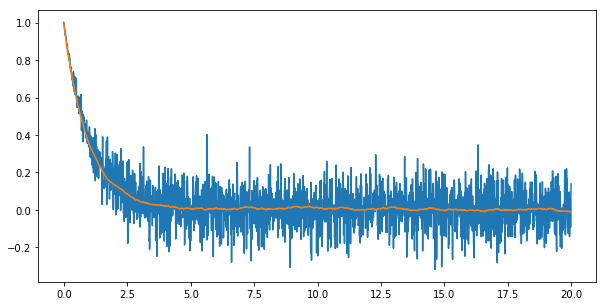

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(t, np.squeeze(x))
plt.plot(t, x_test)

In [10]:
import src.unity_env